In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
biz_df = pd.read_csv('C:/Users/Diya/OneDrive/Desktop/Mini Project/Datasets/biz_large.csv')

In [63]:
print(biz_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     79 non-null     object 
 1   tx_count                 79 non-null     int64  
 2   tx_sum_gbp               79 non-null     float64
 3   tx_mean_gbp              79 non-null     float64
 4   tx_median_gbp            79 non-null     float64
 5   customers_sorted_unique  79 non-null     object 
 6   customers_tx_count       79 non-null     object 
 7   industry_category        79 non-null     object 
dtypes: float64(3), int64(1), object(4)
memory usage: 5.1+ KB
None


In [64]:
biz_df.head(5)

,name,tx_count,tx_sum_gbp,tx_mean_gbp,tx_median_gbp,customers_sorted_unique,customers_tx_count,industry_category
0,ACCESSORY_SHOP,3325,74862.00,22.514887,22.00,"[1357.0, 1607.0, 1623.0, 1828.0, 1931.0, 2090....","[6, 10, 10, 5, 14, 6, 6, 7, 7, 5, 11, 9, 9, 9,...",Accessories
1,A_CAFE,475154,1144734.25,2.409186,2.40,"[1000.0, 1002.0, 1006.0, 1053.0, 1059.0, 1071....","[116, 53, 118, 55, 45, 55, 65, 57, 143, 50, 58...",Cafes
2,A_LOCAL_COFFEE_SHOP,474159,1141932.30,2.408332,2.40,"[1000.0, 1002.0, 1006.0, 1018.0, 1053.0, 1059....","[117, 46, 137, 4, 55, 40, 53, 55, 46, 130, 54,...",Cafes
3,A_SUPERMARKET,81335,5652778.58,69.499952,65.22,"[1000.0, 1002.0, 1006.0, 1018.0, 1053.0, 1059....","[2, 5, 16, 15, 3, 5, 4, 18, 16, 10, 11, 7, 4, ...",Supermarkets
4,BAR,770414,8458081.50,10.978619,11.00,"[1000.0, 1002.0, 1006.0, 1018.0, 1053.0, 1059....","[72, 110, 104, 110, 98, 82, 117, 71, 139, 65, ...",Pubs / Bars


In [65]:
# Example: Calculate 'tx_mean_gbp' if you have the total sum and count
# This is just an illustrative example; adjust calculations based on your actual data structure
biz_df['tx_mean_gbp'] = biz_df['tx_sum_gbp'] / biz_df['tx_count']

# Then, proceed with your anomaly detection code



In [112]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame containing the entire dataset

# Selecting numerical features for anomaly detection
features = biz_df[['tx_count', 'tx_sum_gbp', 'tx_mean_gbp', 'tx_median_gbp']]

# Optional: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(scaled_features)

# Predictions: -1 for anomalies, 1 for normal observations
predictions = iso_forest.predict(scaled_features)





In [113]:
# Selecting specific columns from 'biz_df' to include in the new DataFrame
selected_columns = biz_df[['name','tx_count', 'tx_sum_gbp', 'tx_mean_gbp', 'tx_median_gbp']]  # Adjust columns as needed

# Creating a new DataFrame with selected columns
anomaly_df = selected_columns.copy()

# Adding the 'anomaly' column to the new DataFrame
# Convert predictions from -1 (anomaly) and 1 (normal) to a more descriptive format if desired
anomaly_df['anomaly'] = predictions  # Assuming 'predictions' is the array of anomaly labels from Isolation Forest

# Now, 'new_df' contains the selected columns from 'biz_df' plus the 'anomaly' column
# Display the first few rows of the new DataFrame to verify
print(anomaly_df.head())

                  name  tx_count  tx_sum_gbp  tx_mean_gbp  tx_median_gbp  \
0       ACCESSORY_SHOP      3325    74862.00    22.514887          22.00   
1               A_CAFE    475154  1144734.25     2.409186           2.40   
2  A_LOCAL_COFFEE_SHOP    474159  1141932.30     2.408332           2.40   
3        A_SUPERMARKET     81335  5652778.58    69.499952          65.22   
4                  BAR    770414  8458081.50    10.978619          11.00   

   anomaly  
0        1  
1        1  
2        1  
3        1  
4       -1  


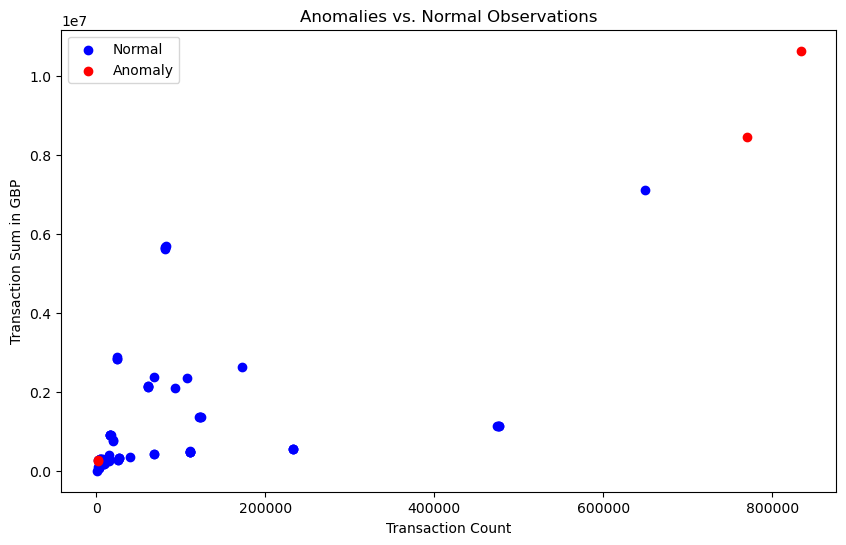

In [114]:
# Filter the anomalies and normal observations into two separate DataFrames
anomalies = anomaly_df[anomaly_df['anomaly'] == -1]
normal = anomaly_df[anomaly_df['anomaly'] == 1]

# Plot
plt.figure(figsize=(10, 6))

# Plot normal observations
plt.scatter(normal['tx_count'], normal['tx_sum_gbp'], c='blue', label='Normal')

# Plot anomalies
plt.scatter(anomalies['tx_count'], anomalies['tx_sum_gbp'], c='red', label='Anomaly')

# Labeling
plt.xlabel('Transaction Count')
plt.ylabel('Transaction Sum in GBP')
plt.title('Anomalies vs. Normal Observations')
plt.legend()

# Show the plot
plt.show()


In [116]:
# Example using the 'tx_sum_gbp' column from your DataFrame
mean_tx_sum_gbp = biz_df['tx_sum_gbp'].mean()
std_tx_sum_gbp = biz_df['tx_sum_gbp'].std()

# Defining limits: mean ± 3*std as an example
lower_limit_tx_sum_gbp = mean_tx_sum_gbp - 3 * std_tx_sum_gbp
upper_limit_tx_sum_gbp = mean_tx_sum_gbp + 3 * std_tx_sum_gbp

# Classifying data points
biz_df['anomaly_tx_sum_gbp'] = biz_df['tx_sum_gbp'].apply(lambda x: 'normal' if lower_limit_tx_sum_gbp <= x <= upper_limit_tx_sum_gbp else 'anomaly')

# To create a new DataFrame with selected columns and the 'anomaly' classification
selected_columns = biz_df[['tx_count', 'tx_sum_gbp']]  # Adjust columns as needed
new_df = selected_columns.copy()
new_df['anomaly'] = biz_df['anomaly_tx_sum_gbp']

print(new_df.head())


   tx_count  tx_sum_gbp  anomaly
0      3325    74862.00   normal
1    475154  1144734.25   normal
2    474159  1141932.30   normal
3     81335  5652778.58   normal
4    770414  8458081.50  anomaly


In [105]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'tx_sum_gbp' column
Q1 = biz_df['tx_sum_gbp'].quantile(0.25)
Q3 = biz_df['tx_sum_gbp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for normal data
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Display the bounds
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Lower Bound: -1388954.4
Upper Bound: 3017877.04


In [118]:
# Get anomaly scores
anomaly_scores = iso_forest.decision_function(scaled_features)
anomaly_scores

array([ 0.22189715,  0.09783208,  0.08928114,  0.07585722, -0.01444996,
        0.24698646,  0.15676551,  0.24767992,  0.22960063,  0.20220008,
        0.25746818,  0.20064629,  0.21025442,  0.0553038 ,  0.21610683,
        0.11783653,  0.24799558,  0.23991579,  0.02775272,  0.18898638,
        0.21025442, -0.00528678,  0.06445704,  0.16010749,  0.06658658,
        0.17427258,  0.21330522,  0.20128034,  0.14753143,  0.14799903,
        0.25206993,  0.14971081,  0.00378584,  0.19407294,  0.25643789,
        0.21621739,  0.22346298,  0.20939627,  0.21070049,  0.0679095 ,
        0.26096729,  0.24516233,  0.20881882,  0.10531054,  0.00058742,
        0.22276332,  0.21882864,  0.24697193,  0.24340003,  0.24304723,
        0.14446419, -0.09079479,  0.17505233,  0.22873547,  0.26603383,
        0.15848185,  0.230556  ,  0.18837182,  0.24872275,  0.24628686,
        0.17195219,  0.25668637,  0.2124158 ,  0.20680281,  0.20601571,
        0.26112894, -0.01044643,  0.10223276,  0.1169099 ,  0.19

Scores above a certain threshold (e.g., the 75th percentile) are considered "No Risk".
Scores below this threshold but above a lower threshold (e.g., the 25th percentile) are "Medium Risk".
Scores below the lower threshold are "High Risk".

In [119]:
# Define thresholds
threshold_no_risk = np.percentile(anomaly_scores, 75)
threshold_high_risk = np.percentile(anomaly_scores, 25)


Since Isolation Forest labels anomalies as -1, we should focus on adjusting risk levels among these
Assuming a simple approach where all normal observations are 'No Risk' and using anomaly scores to distinguish between 'Medium Risk' and 'High Risk' among anomalies

In [122]:
# Define a new threshold based on anomaly scores for anomalies only
# Note: Adjust the calculation of thresholds as per your requirement
anomaly_scores_anomalies = anomaly_scores[anomaly_df['anomaly'] == -1]
threshold_medium_risk = np.percentile(anomaly_scores_anomalies, 50)  # Median score among anomalies

def categorize_risk_updated(is_anomaly, score):
    if is_anomaly == 1:  # Normal observation
        return 'No Risk'
    else:  # Anomaly
        return 'High Risk' if score < threshold_medium_risk else 'Medium Risk'

# Apply the updated categorization
anomaly_df['risk_category'] = [categorize_risk_updated(is_anomaly, score) for is_anomaly, score in zip(anomaly_df['anomaly'], anomaly_scores)]


In [124]:
# Display the DataFrame with risk categories
print(anomaly_df.head(10))


                  name  tx_count  tx_sum_gbp  tx_mean_gbp  tx_median_gbp  \
0       ACCESSORY_SHOP      3325    74862.00    22.514887          22.00   
1               A_CAFE    475154  1144734.25     2.409186           2.40   
2  A_LOCAL_COFFEE_SHOP    474159  1141932.30     2.408332           2.40   
3        A_SUPERMARKET     81335  5652778.58    69.499952          65.22   
4                  BAR    770414  8458081.50    10.978619          11.00   
5             BOOKSHOP     26186   324530.00    12.393264          12.00   
6              BUTCHER     93333  2097495.50    22.473246          22.45   
7             BUTCHERS     14905   294408.00    19.752298          18.00   
8                 CAFE    111139   489245.50     4.402105           4.50   
9      CHILDRENDS_SHOP     16638   916095.00    55.060404          55.00   

   anomaly risk_category  
0        1       No Risk  
1        1       No Risk  
2        1       No Risk  
3        1       No Risk  
4       -1     High Risk  
5

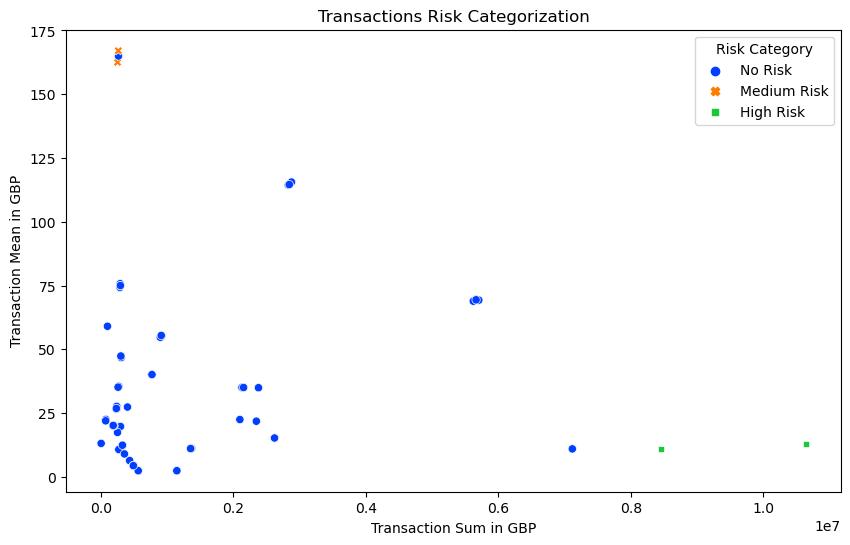

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

anomaly_df['risk_category'] = pd.Categorical(anomaly_df['risk_category'], categories=["No Risk", "Medium Risk", "High Risk"])

# Use seaborn to create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=anomaly_df, x='tx_sum_gbp', y='tx_mean_gbp', hue='risk_category', style='risk_category', palette='bright')

# Adding plot title and labels
plt.title('Transactions Risk Categorization')
plt.xlabel('Transaction Sum in GBP')
plt.ylabel('Transaction Mean in GBP')

# Show legend
plt.legend(title='Risk Category')

# Display the plot
plt.show()


In [126]:
# Select rows where the 'risk_category' is 'High Risk'
high_risk_rows = anomaly_df[anomaly_df['risk_category'] == 'High Risk']

# Display the rows categorized as 'High Risk'
print(high_risk_rows)


   name  tx_count   tx_sum_gbp  tx_mean_gbp  tx_median_gbp  anomaly  \
4   BAR    770414   8458081.50    10.978619           11.0       -1   
51  PUB    834380  10639504.55    12.751390           11.5       -1   

   risk_category  
4      High Risk  
51     High Risk  


In [127]:
# Select rows where the 'risk_category' is 'Medium Risk'
medium_risk_rows = anomaly_df[anomaly_df['risk_category'] == 'Medium Risk']

# Display the rows categorized as 'Medium Risk'
print(medium_risk_rows)


                name  tx_count  tx_sum_gbp  tx_mean_gbp  tx_median_gbp  \
21  ELECTRONICS_SHOP      1543    250739.0   162.500972          159.0   
66         TECH_SHOP      1569    262087.0   167.040790          171.0   

    anomaly risk_category  
21       -1   Medium Risk  
66       -1   Medium Risk  


In [130]:
# Select rows where the 'risk_category' is 'No Risk'
no_risk_rows = anomaly_df[anomaly_df['risk_category'] == 'No Risk']

# Display the rows categorized as 'No Risk'
print(no_risk_rows)


                      name  tx_count  tx_sum_gbp  tx_mean_gbp  tx_median_gbp  \
0           ACCESSORY_SHOP      3325    74862.00    22.514887          22.00   
1                   A_CAFE    475154  1144734.25     2.409186           2.40   
2      A_LOCAL_COFFEE_SHOP    474159  1141932.30     2.408332           2.40   
3            A_SUPERMARKET     81335  5652778.58    69.499952          65.22   
5                 BOOKSHOP     26186   324530.00    12.393264          12.00   
..                     ...       ...         ...          ...            ...   
74  WE_HAVE_BEAN_WEIGHTING      8596   237398.69    27.617344          27.73   
75             WHISKEY_BAR    122900  1363735.00    11.096298          11.50   
76            WHISKEY_SHOP      8800   234605.43    26.659708          19.99   
77                WINE_BAR    121995  1353191.50    11.092188          11.50   
78             WINE_CELLAR      8670   232540.25    26.821251          19.99   

    anomaly risk_category  
0         1